# Race NOT Included

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

#loading data
data = pd.read_csv('/Users/yunjuha/Desktop/ML-DXA-BIS/Data Files/ML-DXA-BIS_Combined_Data.csv')
df = pd.DataFrame(data)

#TRANSFORMING THE TARGETS
df['tjumppownums'] = np.log(df['jumppownums'] + 0.1)
df['tCOMB4IMaxGrip'] = np.sqrt(df['COMB4IMaxGrip'])

#dropping columns
column_to_drop = ['M2ID', 'MIDUSID', 'SAMPLMAJ', 'Height.cm.', 'Weight.kg.', 'Age.years.', 'TBW.litres.', 'ECF.litres.', 'ICF.litres.']
df = df.drop(column_to_drop, axis=1)

df = df.drop('COMB1PF7A', axis=1)

In [27]:
#total number of individuals when race is not included
df = df.dropna()
print(len(df))

490


# MLR

In [28]:
#MLR Function

def train_test_linear_regression(df, feature_columns, target_column, remove_by=40, random_state=42):
    original_size = len(df)
    r_squared_data = []

    while len(df) >= remove_by:        
        columns = feature_columns + [target_column]
        X = df[columns]
        y = X.pop(target_column)
        
        #dividing into train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        #TRAINING
        #print("\nTRAINING Metrics")
        X_train_const = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train_const)
        results = model.fit()
        #print(results.summary())
        training_r_squared = results.rsquared
        #print("Training R2:", training_r_squared)

        #TESTING
        #print("\nTEST Metrics")
        mlr = LinearRegression()
        mlr.fit(X_train, y_train)

        test_pred = mlr.predict(X_test)

        #mse_test = metrics.mean_squared_error(y_test, test_pred)
        #rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
        r2_test = metrics.r2_score(y_test, test_pred)

        #print("MSE:", mse_test)
        #print("RMSE:", rmse_test)
        #print("Testing R2:", r2_test)

        r_squared_data.append({'Number of Individuals': len(df), 'Training R-squared': training_r_squared, 'Testing R-squared': r2_test})

        #randoming remove 40 individuals
        indices_to_remove = df.sample(n=remove_by, random_state=random_state).index
        df = df.drop(indices_to_remove)

    #table of R-squared values
    r_squared_table = pd.DataFrame(r_squared_data)
    print("\nR-squared Values:")
    print(r_squared_table)

    #plot
    plt.figure(figsize=(10, 6))
    plt.plot(r_squared_table['Number of Individuals'], r_squared_table['Training R-squared'], label='Training R-squared')
    plt.plot(r_squared_table['Number of Individuals'], r_squared_table['Testing R-squared'], label='Testing R-squared')
    plt.xlabel('Number of Individuals')
    plt.ylabel('R-squared')
    plt.title('Training and Testing R-squared vs Number of Individuals')
    plt.legend()
    plt.show()

## DXA: Handgrip Strength (ARMS)

MLR: DXA Model, Handgrip Strength (Arms)



R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.532415           0.374216
1                     450            0.536737           0.427874
2                     410            0.533492           0.463664
3                     370            0.493693           0.620549
4                     330            0.498002           0.475548
5                     290            0.461889           0.504458
6                     250            0.473615           0.408373
7                     210            0.413576           0.517633
8                     170            0.428353           0.283372
9                     130            0.459593           0.044304
10                     90            0.404420           0.588714
11                     50            0.529641          -0.036791


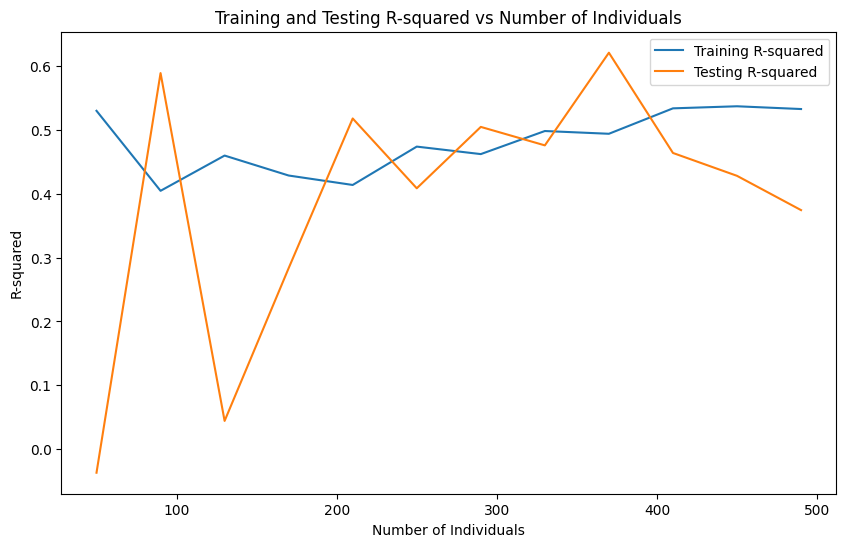

In [29]:
print("MLR: DXA Model, Handgrip Strength (Arms)")

train_test_linear_regression(df, ['COMB4DALM', 'COMB4DABM', 'COMB4DAFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLR3MD'], 'tCOMB4IMaxGrip')

## DXA: Handgrip Strength (TOTAL BODY)

MLR: DXA Model, Handgrip Strength (TB)



R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.519670           0.418501
1                     450            0.530452           0.424842
2                     410            0.529776           0.446693
3                     370            0.480414           0.629085
4                     330            0.488474           0.437197
5                     290            0.450460           0.483785
6                     250            0.484548           0.280815
7                     210            0.434765           0.447610
8                     170            0.467780           0.207922
9                     130            0.451811           0.366295
10                     90            0.416319           0.325109
11                     50            0.639021          -0.245194


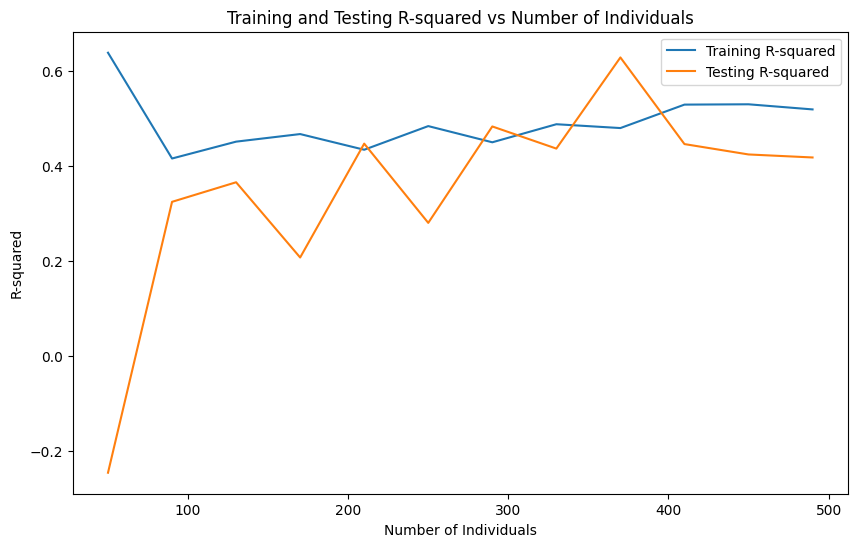

In [30]:
print("MLR: DXA Model, Handgrip Strength (TB)")

train_test_linear_regression(df, ['COMB4IALM', 'COMB4DTBBM', 'COMB4DTBFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLR3MD', 'COMB4DLFNMD', 'COMB4DLSL14MD'], 'tCOMB4IMaxGrip')

## DXA: Jump Power (LEGS)

MLR: DXA Model, Jump Power (Legs)

R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.683999           0.799478
1                     450            0.713518           0.578644
2                     410            0.720730           0.626630
3                     370            0.696203           0.779439
4                     330            0.663654           0.833479
5                     290            0.701193           0.618967
6                     250            0.693949           0.687750
7                     210            0.719279           0.593002
8                     170            0.713624           0.714363
9                     130            0.710616           0.671654
10                     90            0.692900           0.671913
11                     50            0.688549           0.741072


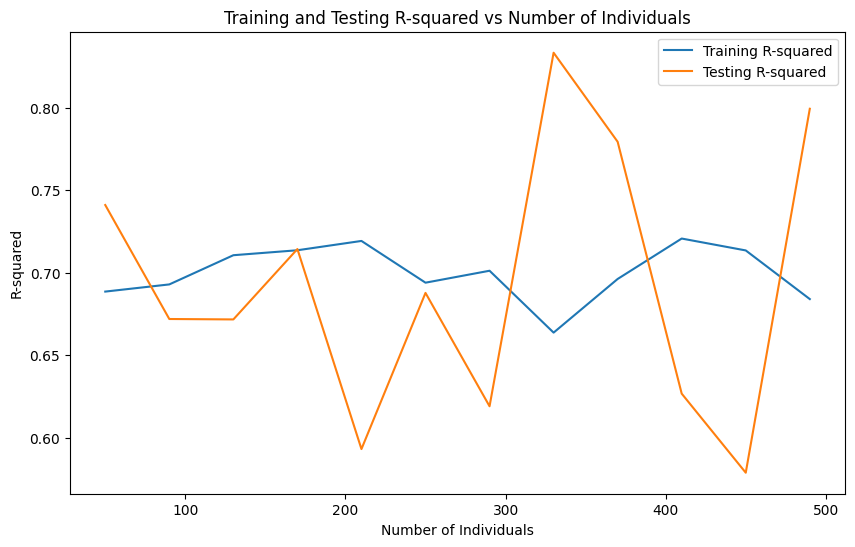

In [31]:
print("MLR: DXA Model, Jump Power (Legs)")

train_test_linear_regression(df, ['COMB4ILLM', 'COMB4DLBM', 'COMB4DLFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLFNMD'], 'tjumppownums')


## DXA: Jump Power (TOTAL BODY)

MLR: DXA Model, Jump Power (TB)



R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.704995           0.794776
1                     450            0.733133           0.605244
2                     410            0.745331           0.622217
3                     370            0.725552           0.790490
4                     330            0.696844           0.828048
5                     290            0.733744           0.629401
6                     250            0.724025           0.713837
7                     210            0.750183           0.602243
8                     170            0.749999           0.707231
9                     130            0.746900           0.699129
10                     90            0.733093           0.658208
11                     50            0.757852           0.171653


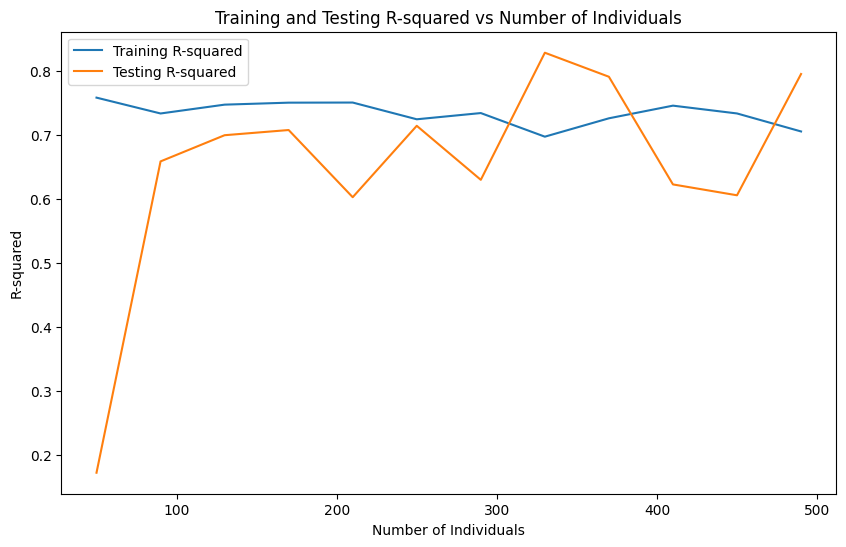

In [32]:
print("MLR: DXA Model, Jump Power (TB)")

train_test_linear_regression(df, ['COMB4IALM', 'COMB4DTBBM', 'COMB4DTBFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLR3MD', 'COMB4DLFNMD', 'COMB4DLSL14MD'], 'tjumppownums')


## BIS: Handgrip Strength

MLR: BIS Model, Handgrip Strength

R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.546119           0.382558
1                     450            0.560341           0.391512
2                     410            0.554245           0.458711
3                     370            0.517466           0.613856
4                     330            0.530642           0.441197
5                     290            0.504110           0.482109
6                     250            0.529522           0.372636
7                     210            0.500743           0.468298
8                     170            0.533372           0.289331
9                     130            0.562571           0.235673
10                     90            0.542625           0.560105
11                     50            0.689113          -0.198372


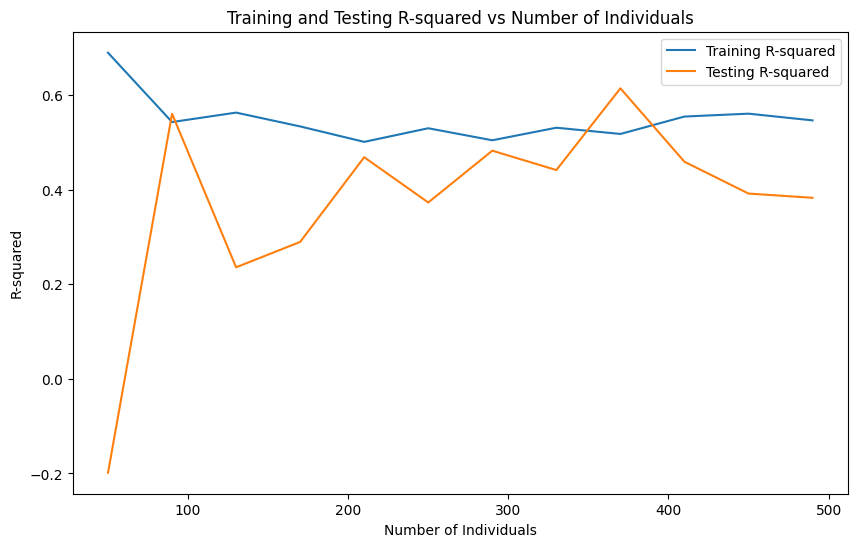

In [33]:
print("MLR: BIS Model, Handgrip Strength")

train_test_linear_regression(df, ['COMB4IMECF', 'COMB4IMICF', 'COMB4IMFFM', 'COMB4DTBFM', 'COMB4IRES0', 'COMB4IRESINF', 'COMB4IRESEXC', 'COMB4IRESINC', 'COMB4IFCHAR', 'COMB4IMCAP', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A'], 'tCOMB4IMaxGrip')


## BIS: Jump Power

MLR: BIS Model, Jump Power



R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.731187           0.683647
1                     450            0.761821           0.573371
2                     410            0.771602           0.625781
3                     370            0.761885           0.754278
4                     330            0.733679           0.806237
5                     290            0.768089           0.640674
6                     250            0.780705           0.607391
7                     210            0.787782           0.723769
8                     170            0.784854           0.766302
9                     130            0.788439           0.665348
10                     90            0.783591           0.690111
11                     50            0.870263           0.015841


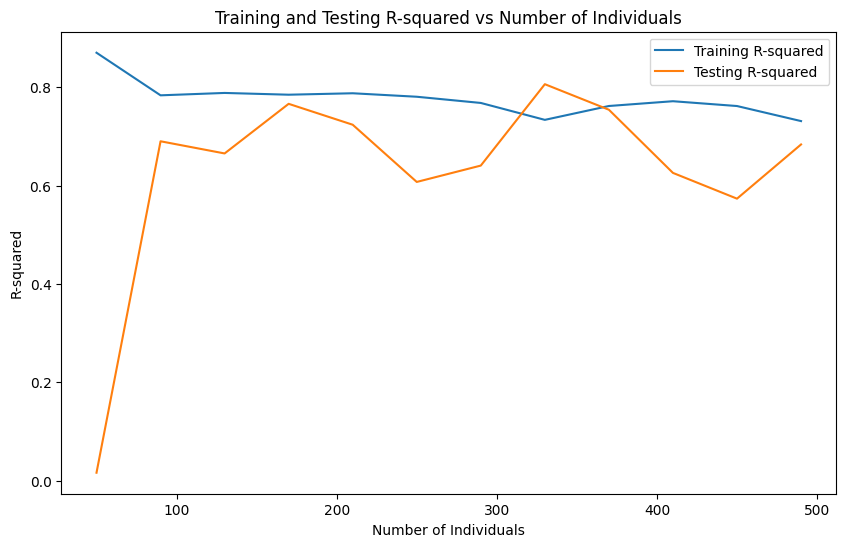

In [34]:
print("MLR: BIS Model, Jump Power")

train_test_linear_regression(df, ['COMB4IMECF', 'COMB4IMICF', 'COMB4IMFFM', 'COMB4DTBFM', 'COMB4IRES0', 'COMB4IRESINF', 'COMB4IRESEXC', 'COMB4IRESINC', 'COMB4IFCHAR', 'COMB4IMCAP', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A'], 'tjumppownums')


## COMBO: Handgrip Strength (ARMS)

MLR: Combo Models, Handgrip Strength (Arms)



R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.559489           0.351562
1                     450            0.569711           0.382746
2                     410            0.563360           0.450926
3                     370            0.527902           0.609300
4                     330            0.544607           0.441999
5                     290            0.528513           0.405330
6                     250            0.564558           0.251655
7                     210            0.531801           0.528715
8                     170            0.559451           0.331789
9                     130            0.622661           0.000800
10                     90            0.591749           0.619982
11                     50            0.754637          -0.444847


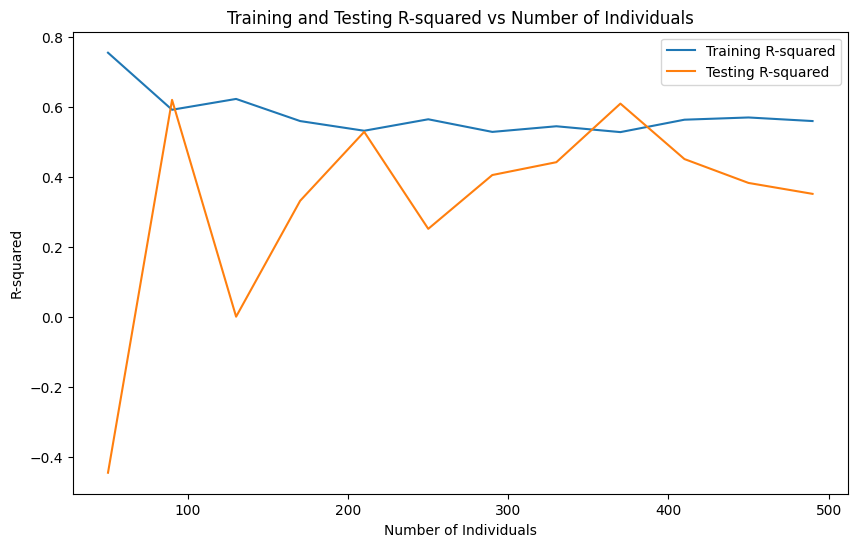

In [35]:
print("MLR: Combo Models, Handgrip Strength (Arms)")

train_test_linear_regression(df, ['COMB4DALM', 'COMB4DABM', 'COMB4DAFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLR3MD', 'COMB4IMECF', 'COMB4IMICF', 'COMB4IMFFM', 'COMB4DTBFM', 'COMB4IRES0', 'COMB4IRESINF', 'COMB4IRESEXC', 'COMB4IRESINC', 'COMB4IFCHAR', 'COMB4IMCAP'], 'tCOMB4IMaxGrip')


## COMBO: Handgrip Strength (TOTAL BODY)

MLR: Combo Models, Handgrip Strength (TB)

R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.550091           0.376199
1                     450            0.566019           0.375203
2                     410            0.557918           0.453418
3                     370            0.519572           0.607615
4                     330            0.535338           0.429176
5                     290            0.509672           0.461510
6                     250            0.536639           0.291475
7                     210            0.512832           0.438295
8                     170            0.553447           0.245772
9                     130            0.588272           0.161995
10                     90            0.566796           0.327647
11                     50            0.754292          -0.738585


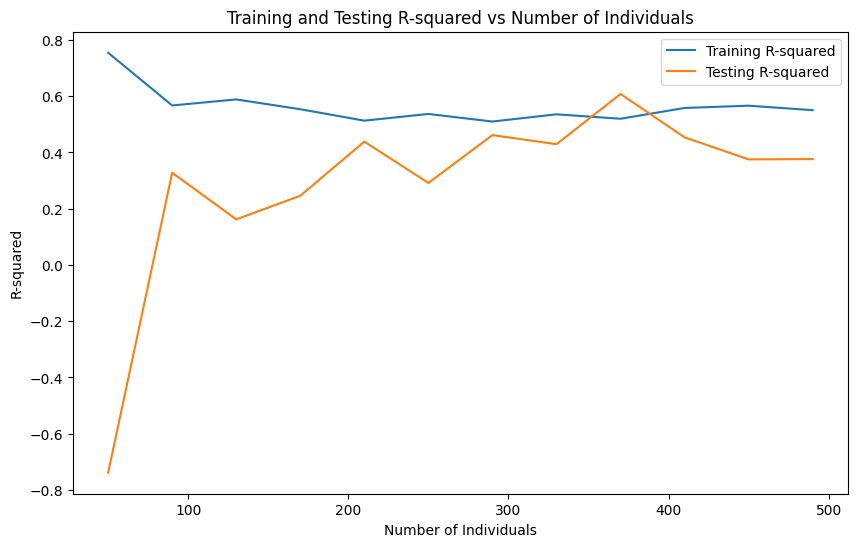

In [36]:
print("MLR: Combo Models, Handgrip Strength (TB)")

train_test_linear_regression(df, ['COMB4IALM', 'COMB4DTBBM', 'COMB4DTBFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLR3MD', 'COMB4DLFNMD', 'COMB4DLSL14MD', 'COMB4IMECF', 'COMB4IMICF','COMB4IMFFM', 'COMB4DTBFM', 'COMB4IRES0', 'COMB4IRESINF', 'COMB4IRESEXC', 'COMB4IRESINC', 'COMB4IFCHAR', 'COMB4IMCAP'], 'tCOMB4IMaxGrip')


## COMBO: Jump Power (LEGS)

MLR: Combo Models, Jump Power (Legs)



R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.747438           0.709924
1                     450            0.773920           0.620141
2                     410            0.782641           0.657692
3                     370            0.774263           0.766855
4                     330            0.746675           0.831090
5                     290            0.778593           0.676010
6                     250            0.790054           0.618780
7                     210            0.804084           0.697789
8                     170            0.800733           0.773700
9                     130            0.798321           0.695379
10                     90            0.790519           0.701601
11                     50            0.884073           0.238366


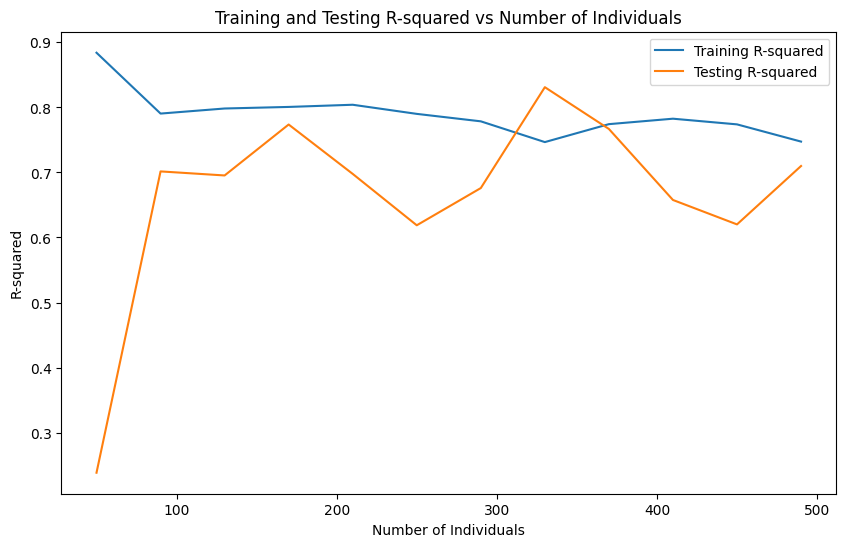

In [37]:
print("MLR: Combo Models, Jump Power (Legs)")

train_test_linear_regression(df, ['COMB4ILLM', 'COMB4DLBM', 'COMB4DLFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLFNMD', 'COMB4IMECF', 'COMB4IMICF', 'COMB4IMFFM', 'COMB4DTBFM', 'COMB4IRES0', 'COMB4IRESINF', 'COMB4IRESEXC', 'COMB4IRESINC', 'COMB4IFCHAR', 'COMB4IMCAP'], 'tjumppownums')


## COMBO: Jump Power (TOTAL BODY)

MLR: Combo Models, Jump Power (TB)

R-squared Values:
    Number of Individuals  Training R-squared  Testing R-squared
0                     490            0.759771           0.727983
1                     450            0.783990           0.646320
2                     410            0.795476           0.662456
3                     370            0.787748           0.785713
4                     330            0.762319           0.831936
5                     290            0.791491           0.696598
6                     250            0.802448           0.633470
7                     210            0.811229           0.725233
8                     170            0.811365           0.760901
9                     130            0.809912           0.692597
10                     90            0.797554           0.774064
11                     50            0.896518           0.076268


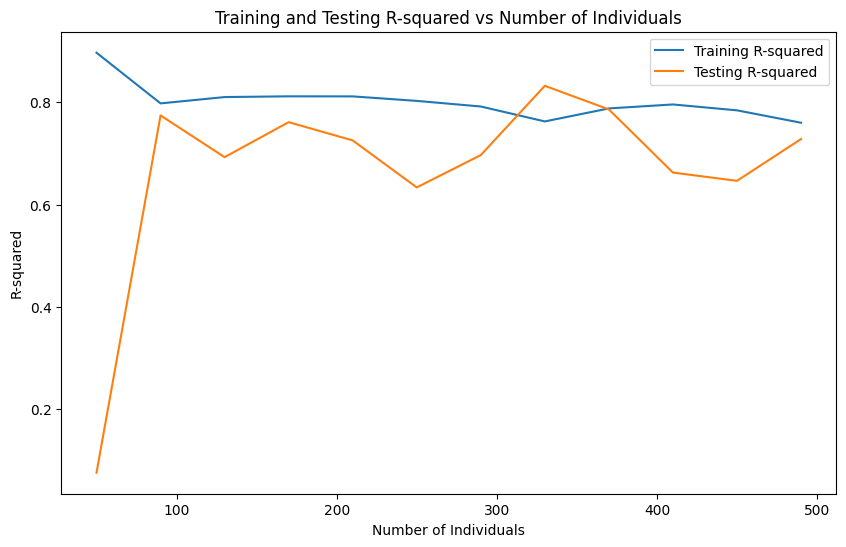

In [38]:
print("MLR: Combo Models, Jump Power (TB)")

train_test_linear_regression(df, ['COMB4IALM', 'COMB4DTBBM', 'COMB4DTBFM', 'COMB1PRSEX', 'COMB1PRAGE', 'COMB4P1A', 'COMB4DLR3MD', 'COMB4DLFNMD', 'COMB4DLSL14MD', 'COMB4IMECF', 'COMB4IMICF','COMB4IMFFM', 'COMB4DTBFM', 'COMB4IRES0', 'COMB4IRESINF', 'COMB4IRESEXC', 'COMB4IRESINC', 'COMB4IFCHAR', 'COMB4IMCAP'], 'tjumppownums')
